### PROGRAM - 3 : Genetic Algorithm

Generation 1: Best Fitness = 1.8096
Generation 2: Best Fitness = 1.7607
Generation 3: Best Fitness = 1.7790
Generation 4: Best Fitness = 1.7790
Generation 5: Best Fitness = 1.8180
Generation 6: Best Fitness = 1.8038
Generation 7: Best Fitness = 1.8010
Generation 8: Best Fitness = 1.8196
Generation 9: Best Fitness = 1.8196
Generation 10: Best Fitness = 1.8196
Generation 11: Best Fitness = 1.8188
Generation 12: Best Fitness = 1.8186
Generation 13: Best Fitness = 1.8182
Generation 14: Best Fitness = 1.8180
Generation 15: Best Fitness = 1.8180
Generation 16: Best Fitness = 1.8180
Generation 17: Best Fitness = 1.8180
Generation 18: Best Fitness = 1.8180
Generation 19: Best Fitness = 1.8180
Generation 20: Best Fitness = 1.8180
Generation 21: Best Fitness = 1.8180
Generation 22: Best Fitness = 1.8180
Generation 23: Best Fitness = 1.8180
Generation 24: Best Fitness = 1.8180
Generation 25: Best Fitness = 1.8180
Generation 26: Best Fitness = 1.8180
Generation 27: Best Fitness = 1.8180
Generation

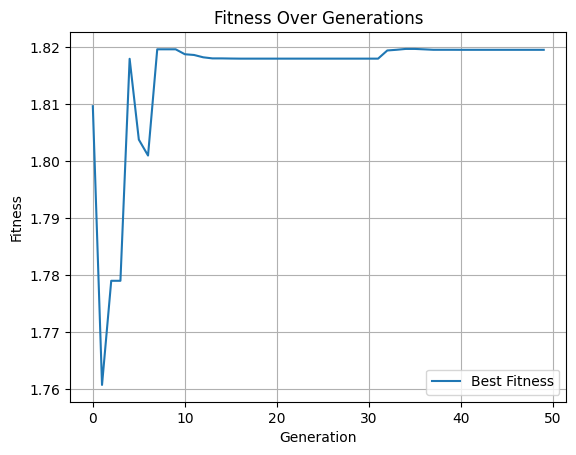

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def fitness_function(x):
    return x * np.sin(x)

population_size = 20
generations = 50
crossover_rate = 0.8
mutation_rate = 0.1
gene_bounds = (0, 10)

population = np.random.uniform(gene_bounds[0], gene_bounds[1], size=population_size)

best_fitness_history = []

for generation in range(generations):
    fitness = fitness_function(population)
    sorted_indices = np.argsort(fitness)[::-1]
    top_half = population[sorted_indices[:population_size // 2]]
    children = []
    while len(children) < population_size:
        if np.random.rand() < crossover_rate:
            parent1, parent2 = np.random.choice(top_half, 2, replace=False)
            child = (parent1 + parent2) / 2
        else:
            child = np.random.choice(top_half)
        if np.random.rand() < mutation_rate:
            child += np.random.uniform(-1.0, 1.0)
        child = np.clip(child, gene_bounds[0], gene_bounds[1])
        children.append(child)

    population = np.array(children)
    best_fitness = np.max(fitness_function(population))
    best_fitness_history.append(best_fitness)

    print(f"Generation {generation + 1}: Best Fitness = {best_fitness:.4f}")

best_solution = population[np.argmax(fitness_function(population))]
print(f"\nBest Solution: x = {best_solution:.4f}, f(x) = {fitness_function(best_solution):.4f}")

plt.plot(best_fitness_history, label='Best Fitness')
plt.title("Fitness Over Generations")
plt.xlabel("Generation")
plt.ylabel("Fitness")
plt.legend()
plt.grid(True)
plt.show()